##### Ejercicio 4

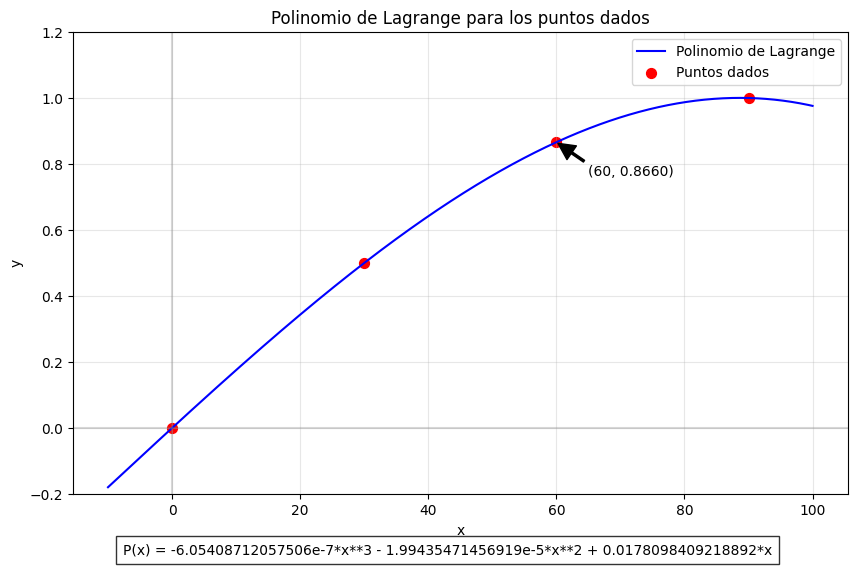

Polinomio de Lagrange: P(x) = -6.05408712057506e-7*x**3 - 1.99435471456919e-5*x**2 + 0.0178098409218892*x


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
import sympy as sp

# Datos proporcionados
x_points = [0, 30, 60, 90]
y_points = [0, 0.5, sqrt(3)/2, 1]

# Función para calcular el polinomio de Lagrange
def lagrange_polynomial(x, x_points, y_points):
    n = len(x_points)
    result = 0

    for i in range(n):
        term = y_points[i]

        for j in range(n):
            if i != j:
                term *= (x - x_points[j]) / (x_points[i] - x_points[j])

        result += term

    return result

# Calcular la expresión algebraica del polinomio de Lagrange
def get_lagrange_expression():
    x = sp.Symbol('x')
    n = len(x_points)
    result = 0

    for i in range(n):
        term = y_points[i]

        for j in range(n):
            if i != j:
                term *= (x - x_points[j]) / (x_points[i] - x_points[j])

        result += term

    # Simplificar y expandir
    result = sp.expand(result)
    return result

# Obtener la expresión algebraica
expr = get_lagrange_expression()
expr_str = str(expr)

# Crear el rango de x para la gráfica
x_range = np.linspace(-10, 100, 1000)

# Calcular los valores del polinomio para cada x
y_range = [lagrange_polynomial(x, x_points, y_points) for x in x_range]

# Crear la gráfica
plt.figure(figsize=(10, 6))

# Graficar el polinomio de Lagrange
plt.plot(x_range, y_range, 'b-', label='Polinomio de Lagrange')

# Graficar los puntos de datos
plt.scatter(x_points, y_points, color='red', s=50, label='Puntos dados')

# Configurar la gráfica
plt.axhline(y=0, color='gray', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='gray', linestyle='-', alpha=0.3)
plt.grid(True, alpha=0.3)
plt.legend()
plt.title('Polinomio de Lagrange para los puntos dados')
plt.xlabel('x')
plt.ylabel('y')

# Añadir el texto del polinomio
plt.figtext(0.5, 0.01, f'P(x) = {expr_str}',
           horizontalalignment='center', fontsize=10,
           bbox={'facecolor': 'white', 'alpha': 0.8, 'pad': 5})

# Mostrar el valor exacto de sqrt(3)/2
sqrt3_2 = sqrt(3)/2
plt.annotate(f'(60, {sqrt3_2:.4f})', xy=(60, sqrt3_2), xytext=(65, sqrt3_2-0.1),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1.5))

plt.ylim(-0.2, 1.2)
plt.show()

# Mostrar el polinomio explícitamente en la consola
print(f"Polinomio de Lagrange: P(x) = {expr_str}")